In [4]:
from comb.behavior_ophys_dataset import BehaviorOphysDataset
from brain_observatory_utilities.datasets.optical_physiology.data_formatting import build_tidy_cell_df, get_stimulus_response_df

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [5]:
# define inputs

data_folder = Path("/root/capsule/data/") # Note: full path, glob doesn't like ~
processed_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44"
plane_folder_path = processed_path / "1287841795" # 1 of 8 possible planes
raw_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08"

In [6]:
bod = BehaviorOphysDataset(plane_folder_path, raw_path, verbose=True)

_platform.json: 1287841795/1287701514_platform.json
processing.json: 1287841795/processing.json
_params.json: events/1287841795_params.json
_registered_metrics.json: movie_qc/1287841795_registered_metrics.json
_output.json: segmentation/segmentation_output.json
_average_projection.png: motion_correction/1287841795_average_projection.png
_max_projection.png: not found
_motion_transform.csv: motion_correction/1287841795_motion_transform.csv
segmentation_output.json: segmentation/segmentation_output.json
roi_traces.h5: trace_extraction/roi_traces.h5
neuropil_correction.h5: neuropil_correction/neuropil_correction.h5
neuropil_masks.json: trace_extraction/neuropil_masks.json
neuropil_trace_output.json: neuropil_correction/neuropil_trace_output.json
demixing_output.h5: demixing/demixing_output.h5
demixing_output.json: demixing/demixing_output.json
dff.h5: dff/dff.h5
extract_traces.json: trace_extraction/extract_traces.json
events_oasis.h5: events/1287841795_events_oasis.h5
MESOSCOPE_FILE_SPLI

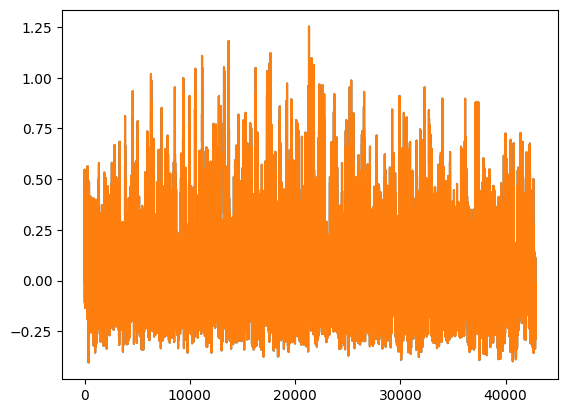

In [8]:
%matplotlib inline
tidy_dff = build_tidy_cell_df(bod)


# plot 1 trace
trace = tidy_dff[tidy_dff.cell_roi_id==1].dff
plt.plot(trace.values)
plt.show()

In [13]:
sdf = get_stimulus_response_df(bod, data_type='dff', event_type='changes',
                               time_window=[-1, 2.1], interpolate=False,
                               output_sampling_rate=None,
                               response_window_duration=0.5)

KeyError: 'is_change'

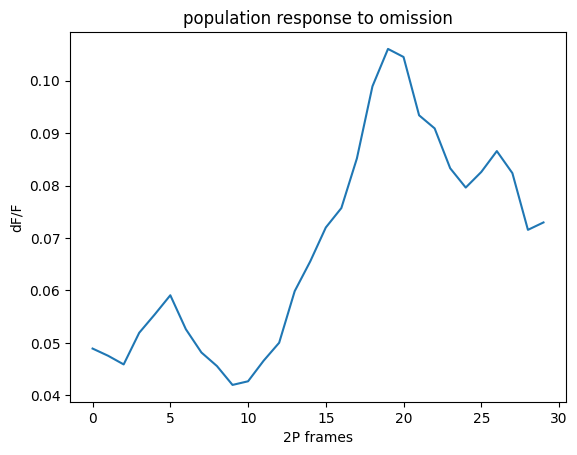

In [11]:
traces = np.vstack(sdf.trace.values)
mean_trace = np.nanmean(traces, axis=0)

plt.plot(mean_trace)
plt.xlabel('2P frames')
plt.ylabel('dF/F')
plt.title('population response to omission')
plt.show()